Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.6653 - acc: 0.7687 - val_loss: 0.6118 - val_acc: 0.7832
Epoch 2/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.4817 - acc: 0.7942 - val_loss: 0.3713 - val_acc: 0.7986
Epoch 3/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.3297 - acc: 0.8021 - val_loss: 0.3042 - val_acc: 0.8030
Epoch 4/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.2933 - acc: 0.8047 - val_loss: 0.2856 - val_acc: 0.8034
Epoch 5/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.2813 - acc: 0.8044 - val_loss: 0.2778 - val_acc: 0.8030


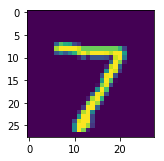

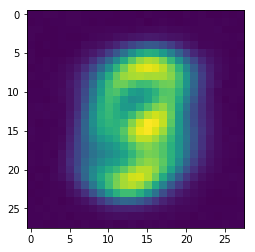

In [50]:
from keras.layers import Input, Dense
from keras.models import Model
import keras.callbacks
from keras import regularizers
import matplotlib.pyplot as plt

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
#Added activity regularization
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
encoded = Dense(32, activation='tanh')(encoded)

# "decoded" is the lossy reconstruction of the input
#Added hidden layer here

decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Fit the model
tbCallBack= keras.callbacks.TensorBoard(log_dir='./Graph1', write_images=True)
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test), callbacks=[tbCallBack])
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

pred = autoencoder.predict(x_test)

plt.figure(figsize=(5, 5))

plt.subplot(121)
curr_img = np.reshape(x_test[0], (28,28))
curr_lbl = x_test[0]
plt.imshow(curr_img)
plt.show() 

decoded_im = np.reshape(decoded_imgs[0],(28,28))
plt.imshow(decoded_im)
plt.show() 



In [7]:
!pip install keras

In [10]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-05-03 20:52:25--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.54.84.112, 35.172.177.65, 34.206.253.53, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.54.84.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14991793 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  14.30M  49.6MB/s    in 0.3s    

2019-05-03 20:52:26 (49.6 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [14991793/14991793]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
LOG_DIR = './Graph1'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [48]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://308d5981.ngrok.io
